In [1]:
.libPaths(R.home('/opt/homebrew/Caskroom/miniforge/base/lib/R/library'))
Output = '/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1013. Microbiome Peanut Allergy/P1013.3. Analyses/P1013.3.1. Data Processing/Output'
cur_date = '090525'

library(readxl)
library(openxlsx)
library(tidyverse)
library(factoextra)
library(ANCOMBC) 

# reading in files
saliva_df = data.frame(read_excel("Input/Saliva_Diversity_082925.xlsx", sheet = 2)) %>%
    mutate(Age = as.numeric(Age), IgE = as.numeric(IgE))
stool_df = data.frame(read_excel("Input/Stool_Diversity_082925.xlsx", sheet = 2)) %>%
    mutate(Age = as.numeric(Age), IgE = as.numeric(IgE))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Age = as.numeric(Age)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Age = as.numeric(Age)`.
Caused by warning:
! NAs introduce

In [2]:
head(saliva_df)

,Original_Sample_ID,Subject_No,Sample_ID,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.p__Firmicutes.c__Clostridia.o__Eubacteriales.f__Peptococcaceae.g__Peptococcus.s__sp._HMT_167,⋯,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Pseudoleptotrichia.s__sp._HMT_219,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Pseudoleptotrichia.__,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__wadei,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__shahii,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__sp._HMT_498,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__sp._HMT_215,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__sp._HMT_392,k__Bacteria.p__Fusobacteria.c__Fusobacteriia.o__Fusobacteriales.f__Leptotrichiaceae.g__Leptotrichia.s__sp._HMT_212,k__Bacteria.p__Gracilibacteria_.GN02..c__Gracilibacteria_.GN02._.C.1..o__Gracilibacteria_.GN02._.O.1..f__Gracilibacteria_.GN02._.F.1..g__Gracilibacteria_.GN02._.G.1..s__bacterium_HMT_872,k__Bacteria.p__Firmicutes.c__Bacilli.o__Lactobacillales.f__Lactobacillaceae.g__Lacticaseibacillus.__
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FS01baseline,1,Pre_1,Pre,P,F,3.838356,41.00,High,0,⋯,0,0,0,0,0,18,15,42,0,0
2,FS0236mo,2,Post_2,Post,A,DS,1.873973,14.20,Low,59,⋯,0,0,0,0,0,532,30,27,0,0
3,FS02baseline,2,Pre_2,Pre,A,DS,1.873973,14.20,Low,0,⋯,0,198,0,0,0,172,0,64,0,0
4,FS0436mo,3,Post_3,Post,P,F,3.715068,67.40,High,0,⋯,0,0,0,0,0,0,0,0,15,0
5,FS04baseline,3,Pre_3,Pre,P,F,3.715068,67.40,High,0,⋯,0,0,0,0,0,0,0,8,0,0
6,FS0536mo,4,Post_4,Post,A,DS,3.991781,9.59,Low,24,⋯,0,0,0,0,0,676,0,207,0,0


# Filter #1: Bacteria Background Filter

Bacteria will be retained if >= 25% were countable values (ie. > 0). 

In [3]:
saliva_presence_df = saliva_df %>%
    pivot_longer(cols = 10:ncol(saliva_df), names_to = "Bacteria", values_to = "Value") %>%
    # if an experimental value is there count it as being "present"
    mutate(count = ifelse(Value > 0, 1, 0)) %>%
    # determining which have at least 25% experimental values
    group_by(Bacteria) %>%
    # calculating the percentage of experimental data points
    reframe(Variable_Presence_Percentage = (sum(count)/n()) * 100) %>%
    filter(Variable_Presence_Percentage >= 25) 

stool_presence_df = stool_df %>%
    pivot_longer(cols = 11:ncol(stool_df), names_to = "Bacteria", values_to = "Value") %>%
    # if an experimental value is there count it as being "present"
    mutate(count = ifelse(Value > 0, 1, 0)) %>%
    # determining which have at least 25% experimental values
    group_by(Bacteria) %>%
    # calculating the percentage of experimental data points
    reframe(Variable_Presence_Percentage = (sum(count)/n()) * 100) %>%
    filter(Variable_Presence_Percentage >= 25) 

head(saliva_presence_df)

Bacteria,Variable_Presence_Percentage
<chr>,<dbl>
k__Bacteria.__.__.__.__.__.__,86.11111
k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_874,59.72222
k__Bacteria.p__Absconditabacteria_.SR1..c__Absconditabacteria_.SR1._.C.1..o__Absconditabacteria_.SR1._.O.1..f__Absconditabacteria_.SR1._.F.1..g__Absconditabacteria_.SR1._.G.1..s__bacterium_HMT_875,25.00000
k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae.g__Actinomyces.__,100.00000
k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae.g__Actinomyces.s__graevenitzii,75.00000
k__Bacteria.p__Actinobacteria.c__Actinomycetia.o__Actinomycetales.f__Actinomycetaceae.g__Schaalia.s__lingnae,69.44444


In [4]:
ncol(saliva_df[,10:ncol(saliva_df)])
nrow(saliva_presence_df)
ncol(stool_df[,10:ncol(stool_df)])
nrow(stool_presence_df)

[1] 275

[1] 118

[1] 734

[1] 152

In [5]:
`%notin%` <- Negate(`%in%`)
filter1_saliva_df = saliva_df[,c(colnames(saliva_df)[1:9], saliva_presence_df$Bacteria)]
filter1_stool_df = stool_df[,c(colnames(stool_df)[1:10], stool_presence_df$Bacteria)]

head(filter1_saliva_df)

,Original_Sample_ID,Subject_No,Sample_ID,Time_Point,Treatment,Outcome,Age,IgE,IgE_Binarized,k__Bacteria.__.__.__.__.__.__,⋯,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.__.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Aggregatibacter.s__aphrophilus,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.__,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Pasteurellales.f__Pasteurellaceae.g__Haemophilus.s__parainfluenzae,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..__,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_347,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.1..s__bacterium_HMT_352,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.3..s__bacterium_HMT_351,k__Bacteria.p__Saccharibacteria_.TM7..c__Saccharibacteria_.TM7._.C.1..o__Saccharibacteria_.TM7._.O.1..f__Saccharibacteria_.TM7._.F.1..g__Saccharibacteria_.TM7._.G.6..s__bacterium_HMT_870
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FS01baseline,1,Pre_1,Pre,P,F,3.838356,41.00,High,7,⋯,57,13,0,213,775,0,14,246,44,64
2,FS0236mo,2,Post_2,Post,A,DS,1.873973,14.20,Low,63,⋯,698,0,43,98,1657,0,0,423,146,123
3,FS02baseline,2,Pre_2,Pre,A,DS,1.873973,14.20,Low,0,⋯,0,0,46,371,3359,0,0,0,0,112
4,FS0436mo,3,Post_3,Post,P,F,3.715068,67.40,High,34,⋯,0,0,0,0,92,0,200,67,32,201
5,FS04baseline,3,Pre_3,Pre,P,F,3.715068,67.40,High,4,⋯,0,0,0,0,43,414,47,0,2,1050
6,FS0536mo,4,Post_4,Post,A,DS,3.991781,9.59,Low,6,⋯,0,17,0,139,2521,0,0,502,39,101


# Filter 2: Participant Filter

In [6]:
subject_saliva_presence_df = filter1_saliva_df %>%
    pivot_longer(cols = 10:ncol(filter1_saliva_df), names_to = "Bacteria", values_to = "Value") %>%
    # if an experimental value is there count it as being "present"
    mutate(count = ifelse(Value > 0, 1, 0)) %>%
    # determining which participants have at least 25% experimental values
    group_by(Subject_No) %>%
    # calculating the percentage of experimental data points
    reframe(Variable_Presence_Percentage = (sum(count)/n()) * 100) %>%
    filter(Variable_Presence_Percentage >= 25) 

subject_stool_presence_df = filter1_stool_df %>%
    pivot_longer(cols = 11:ncol(filter1_stool_df), names_to = "Bacteria", values_to = "Value") %>%
    # if an experimental value is there count it as being "present"
    mutate(count = ifelse(Value > 0, 1, 0)) %>%
    # determining which participants have at least 25% experimental values
    group_by(Subject_No) %>%
    # calculating the percentage of experimental data points
    reframe(Variable_Presence_Percentage = (sum(count)/n()) * 100) %>%
    filter(Variable_Presence_Percentage >= 25) 

head(subject_saliva_presence_df)

Subject_No,Variable_Presence_Percentage
<dbl>,<dbl>
1,68.64407
2,69.91525
3,36.86441
4,68.64407
5,66.10169
6,60.59322


In [7]:
length(unique(saliva_df$Subject_No))
nrow(subject_saliva_presence_df)

length(unique(stool_df$Subject_No))
nrow(subject_stool_presence_df)

[1] 45

[1] 45

[1] 41

[1] 40

In [8]:
# removing subjects
filter2_saliva_df = filter1_saliva_df %>% 
    filter(Subject_No %in% subject_saliva_presence_df$Subject_No)
filter2_stool_df = filter1_stool_df %>% 
    filter(Subject_No %in% subject_stool_presence_df$Subject_No)

Only subject 29 was removed from stool samples. 

# Filter #3: Outlier Detection

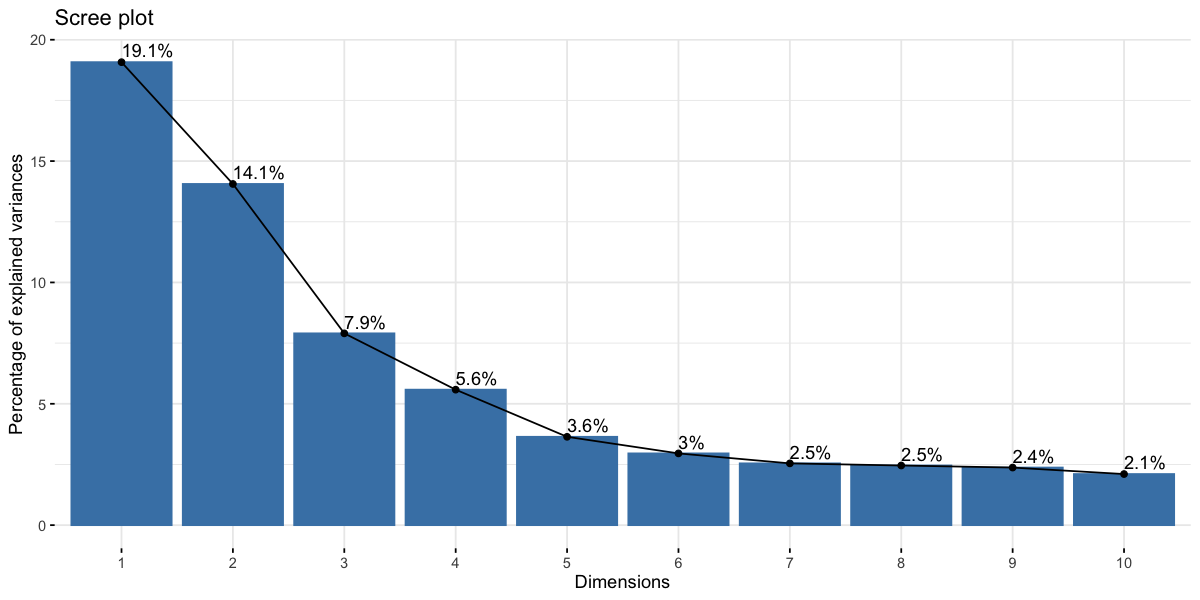

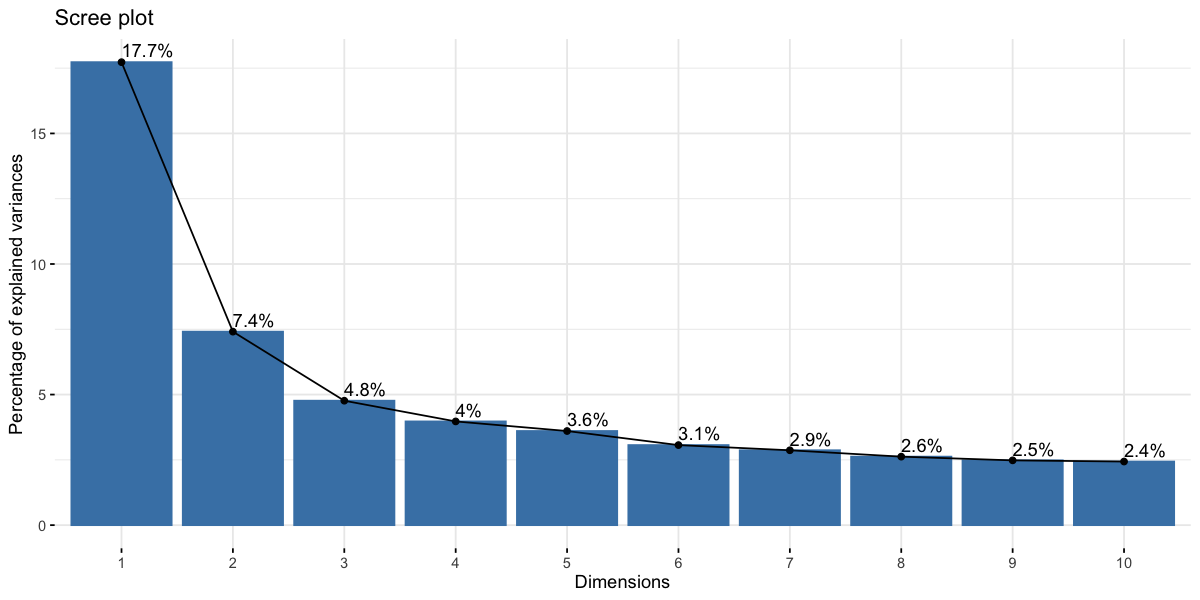

In [9]:
# setting seed for reproducibility
set.seed(12)

# normalizing
norm_saliva_df = apply(filter2_saliva_df[,10:ncol(filter2_saliva_df)], 2, function (x){log(x + 1)})
norm_stool_df = apply(filter2_stool_df[,11:ncol(filter2_stool_df)], 2, function (x){log(x + 1)})

# running pca 
saliva_pca = prcomp(norm_saliva_df, center = TRUE, scale = TRUE)
stool_pca = prcomp(norm_stool_df, center = TRUE, scale = TRUE)

# looking at a scree plot to see how much of the variance was captured in the first 2 eigenvectors
options(repr.plot.width = 10, repr.plot.height = 5) #changing size
fviz_eig(saliva_pca, addlabels = TRUE)
fviz_eig(stool_pca, addlabels = TRUE)

PCA couldn't capture a majority of the variance within the first 2 principal components, so I won't use it to perform outlier detection.

In [10]:
# exporting files
write.xlsx(filter2_saliva_df, paste0(Output,"/", "Processed_Saliva_Data_", cur_date, ".xlsx"), rowNames = FALSE)
write.xlsx(filter2_stool_df, paste0(Output,"/", "Processed_Stool_Data_", cur_date, ".xlsx"), rowNames = FALSE)